### Load packages

In [17]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
# from fbprophet import Prophet

sns.set(font_scale=1.5)
%matplotlib inline

### Load Data

In [18]:
# bring in the monthly global temperature data
df_temp_raw = pd.read_csv('..\data\GlobalTemperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [19]:
df_temp_raw['LandAverageTemperature'].head()

dt
1750-01-01     3.034
1750-02-01     3.083
1750-03-01     5.626
1750-04-01     8.490
1750-05-01    11.573
Name: LandAverageTemperature, dtype: float64

In [21]:
df_temp_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8)
memory usage: 224.4 KB


In [22]:
# fill missing values
df_temp = df_temp_raw['LandAverageTemperature'].fillna(method='backfill')

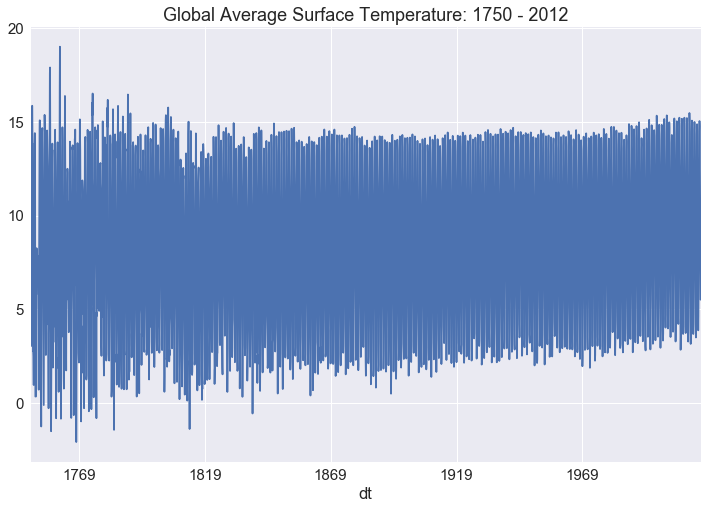

In [33]:
plt.figure(figsize=(12,8))
plt.title('Global Average Surface Temperature: 1750 - 2012')
df_temp.plot();

### Modeling: Structural Modeling/Decomposition

Structural Modeling views a given time series as a function of a general trend, along with a seasonal cycle.

$Xt=Tt+St+Nt$
 
where
$T_t$ = trend component,
$S_t$ = seasonal component,
$N_t$ = noise.

We will essentially estimate the effect that each component has on the series that we are faced with, at different points in that series.

This procedure is so popular that it gets its own function. There are two parameters that we will want to set - first is the model parameter, which we set to 'additive,' as indicated by the above specification. We are also going to need to set the freq parameter, which is referring to the periodicity of the time series. In our case, we use 12 months.

In [24]:
decomp = seasonal_decompose(x=df_temp, model='additive', freq=12)

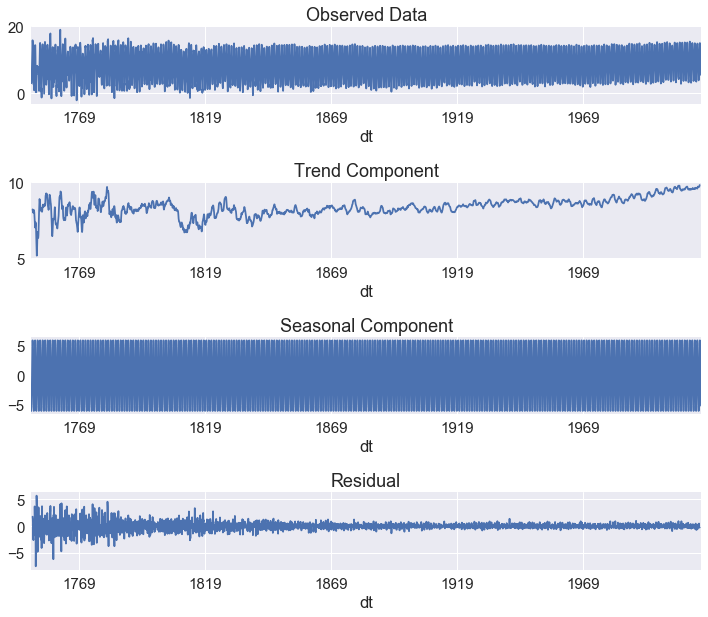

In [32]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10))
plt.subplots_adjust(hspace = 1)
decomp.observed.plot(ax=ax1)
ax1.set_title('Observed Data')
decomp.trend.plot(ax=ax2)
ax2.set_title('Trend Component')
decomp.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')
decomp.resid.plot(ax=ax4)
ax4.set_title('Residual');